# Loan Eligibility Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import f_oneway # ANOVA Analysis
from scipy.stats import ttest_ind # Conducting a T test
from scipy.stats import chi2_contingency # Statistical model for performing a chi squared analysis

In [3]:
df = pd.read_csv(r'C:\Users\biswa\Desktop\OUTR Projects\4th_semester\MajorProject\loan_Eligibility_dataset.csv')

In [4]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [5]:
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


# Checking Dataframe Shape

In [6]:
df.shape

(4269, 13)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [8]:
# checking missing value in dataset
df.isnull().values.any()

False

In [9]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


# check for unique values in each columns

In [10]:
df.nunique()

loan_id                      4269
 no_of_dependents               6
 education                      2
 self_employed                  2
 income_annum                  98
 loan_amount                  378
 loan_term                     10
 cibil_score                  601
 residential_assets_value     278
 commercial_assets_value      188
 luxury_assets_value          379
 bank_asset_value             146
 loan_status                    2
dtype: int64

# Data Cleaning

In [11]:
# Checking for duplicates
df.duplicated(keep=False).sum()

0

In [12]:
# Convert Values in a column in Absolute values
df[' residential_assets_value'] = df[' residential_assets_value'].abs()
(df[' residential_assets_value'] < 0).sum()

0

In [13]:
# Removing whitespaces from column names
df.columns = df.columns.str.strip()

# Removing white spaces from values in the dataframe
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


# Adding New Colums to the Dataframe

In [15]:
# Adding CIBIL Rating column with values (Poor, Average, Good and Excellent)

def cibil_rating(value):
    if 300 <= value <= 549:
        return "Poor"
    elif 550 <= value <= 649:
        return "Average"
    elif 650 <= value <= 749:
        return "Good"
    elif 750 <= value <= 900:
        return "Excellent"
    else:
        return "Error"
    
df['CIBIL_rating'] = df['cibil_score'].apply(cibil_rating)

In [16]:
# Adding Income Level Column
def income_level(value):
    if 100000 <= value <= 1000000:
        return "Low"
    elif 1000001 <= value <= 4000000:
        return "Low-Middle"
    elif 4000001 <= value <= 7500000:
        return "Upper-Middle"
    elif 7500001 <= value <= 10000000:
        return "High"
    else:
        return "Very High Income"
    
df['Income level'] = df['income_annum'].apply(income_level)

In [17]:
# Adding Loan Rating Column
def loan_rating(value):
    if 100000 <= value <= 10000000:
        return "Bronze"
    elif 10000001 <= value <= 20000000:
        return "Silver"
    elif 20000001 <= value <= 30000000:
        return "Gold"
    elif 30000001 <= value <= 40000000:
        return "Platinum"
    else:
        return "Unknown"
    
df['Loan Rating'] = df['loan_amount'].apply(loan_rating)

In [18]:
# Adding Loan Term Column
def loan_term(value):
    if 0 <= value <= 7:
        return "Short Term"
    elif 8 <= value <= 14:
        return "Intermediate"
    elif 15 <= value <= 20:
        return "Long Term"
    else:
        return "Unknown"
    
df['Loan Term Type'] = df['loan_term'].apply(loan_term)

In [19]:
# Adding Dependents Level Column
def dependents(value):
    if 0 <= value <= 1:
        return "Low"
    elif 2 <= value <= 3:
        return "Moderate"
    elif 4 <= value <= 5:
        return "High"
    else:
        return "Unknown"
    
df['Dependent Level'] = df['no_of_dependents'].apply(dependents)

In [20]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,CIBIL_rating,Income level,Loan Rating,Loan Term Type,Dependent Level
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,Excellent,High,Gold,Intermediate,Moderate
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,Poor,Upper-Middle,Silver,Intermediate,Low
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,Poor,High,Gold,Long Term,Moderate
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,Poor,High,Platinum,Intermediate,Moderate
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,Poor,High,Gold,Long Term,High


# Exploratory Data Analysis

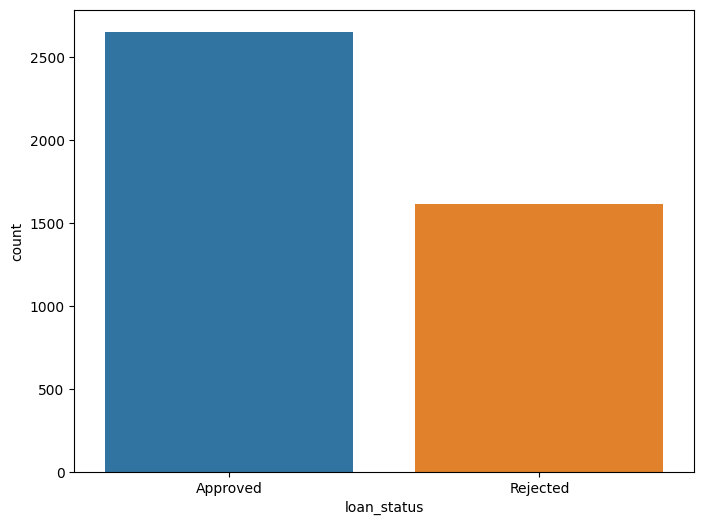

In [21]:
plt.figure(figsize=(8,6))
sns.countplot(df,x="loan_status")
plt.show()

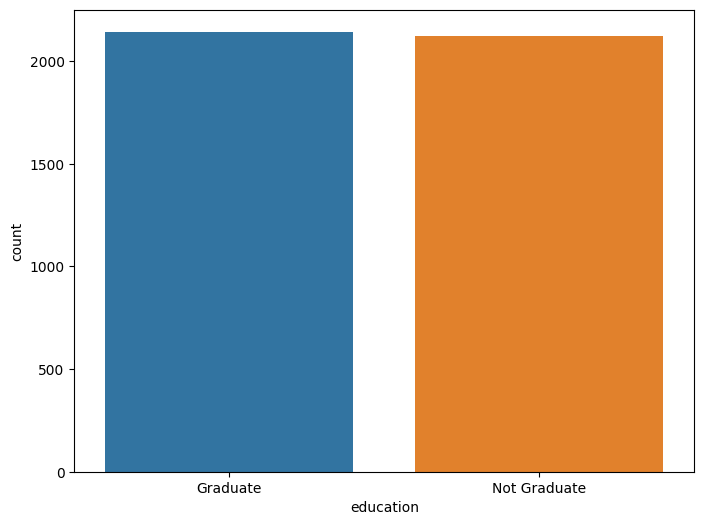

In [22]:
plt.figure(figsize=(8,6))
sns.countplot(df,x="education")
plt.show()

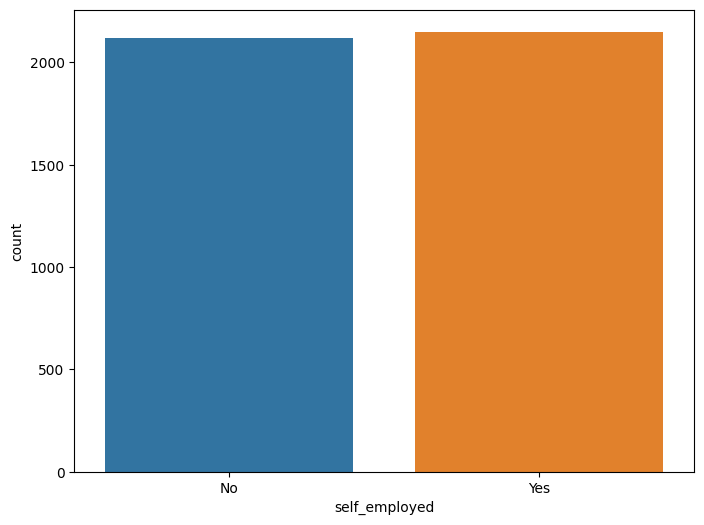

In [23]:
plt.figure(figsize=(8,6))
sns.countplot(df,x="self_employed")
plt.show()

In [24]:
# Segment according to Income
# Group data based on income level
income = df['Income level'].value_counts().reset_index()
income = income.rename(columns={'index':'Income Levels', 'Income level': 'Number of Applicants'})
income

,Income Levels,Number of Applicants
0,Upper-Middle,1548
1,Low-Middle,1284
2,High,1047
3,Low,390


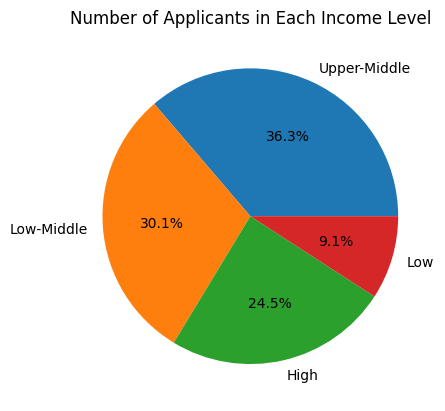

In [25]:
# Plotting the pie chart
plt.pie(income['Number of Applicants'], labels=income['Income Levels'], autopct="%1.1f%%")
plt.title("Number of Applicants in Each Income Level")
plt.show()

In [26]:
# Segment according to Dependents
# Group based on Number of dependents
dependents = df['Dependent Level'].value_counts().reset_index()
dependents = dependents.rename(columns={'index': 'Dependent Level', 'Dependent Level': 'Number of Applicants'})
dependents


,Dependent Level,Number of Applicants
0,Moderate,1435
1,High,1425
2,Low,1409


In [27]:
# Segment according to Education
education = df['education'].value_counts().reset_index()
education = education.rename(columns={'index': 'Education Levels', 'education': 'Number_of_Applicants'})
education


,Education Levels,Number_of_Applicants
0,Graduate,2144
1,Not Graduate,2125


In [28]:
# Segment according to Employment
# Segment according to Employment (self_employed)
employment = df['self_employed'].value_counts().reset_index()
employment = employment.rename(columns={'index': 'Self Employed', 'self_employed': 'Number_of_Applicants'})
employment


,Self Employed,Number_of_Applicants
0,Yes,2150
1,No,2119


# Rate of Loan Approval

In [29]:
# Segment according to Loan Status
loans = df['loan_status'].value_counts().reset_index()
loans = loans.rename(columns={'index': 'Loan Status', 'loan_status': 'Total'})
loans


,Loan Status,Total
0,Approved,2656
1,Rejected,1613


# Loan Approval according to Level of Education

In [30]:
# Grouping data based on Level of Education and Loan approval Status
education = df.groupby(['education', 'loan_status']).size().reset_index()

# Filter to include Approved and Rejected
education = education[education['loan_status'].isin(['Approved', 'Rejected'])]

education


,education,loan_status,0
0,Graduate,Approved,1339
1,Graduate,Rejected,805
2,Not Graduate,Approved,1317
3,Not Graduate,Rejected,808


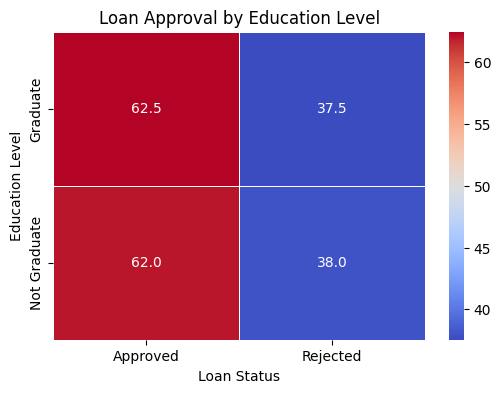

In [31]:
# Pivot Table
pivot_table = education.pivot(index='education', columns='loan_status', values=0)
rows_total = pivot_table.sum(axis=1)
percentage = pivot_table.div(rows_total, axis=0) * 100

# Creating heatmap
plt.figure(figsize=(6,4))
sns.heatmap(percentage, annot=True, fmt='.1f', cmap='coolwarm', linewidth=0.5)

# Creating Labels
plt.title("Loan Approval by Education Level")
plt.xlabel("Loan Status")
plt.ylabel("Education Level")

plt.show()

# Loan Approval according to the the loan rating

In [32]:
# The influence of Loan Rating on loan approvals
# Grouping data based on the Loan Rating and Loan approval Status
loan = df.groupby(['Loan Rating', 'loan_status']).size().reset_index()
loan = loan.rename(columns={0:'Total'})

loan

,Loan Rating,loan_status,Total
0,Bronze,Approved,896
1,Bronze,Rejected,529
2,Gold,Approved,652
3,Gold,Rejected,363
4,Platinum,Approved,179
5,Platinum,Rejected,86
6,Silver,Approved,929
7,Silver,Rejected,635


# Loan Approval according to the type of Employment

In [33]:
# Grouping data based on the Type of Employment and Loan approval Status
employment = df.groupby(['self_employed', 'loan_status']).size().reset_index()

# Filter to include Approved and Rejected
employment = employment[employment['loan_status'].isin(['Approved', 'Rejected'])]
employment = employment.rename(columns={0:'Total'})

employment

,self_employed,loan_status,Total
0,No,Approved,1318
1,No,Rejected,801
2,Yes,Approved,1338
3,Yes,Rejected,812


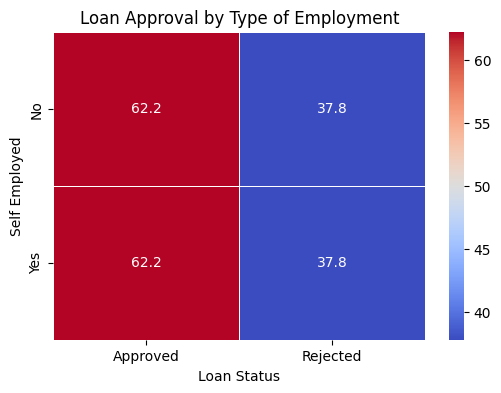

In [34]:
# Pivot Table
pivot_table = employment.pivot(index='self_employed', columns='loan_status', values='Total')
rows_total = pivot_table.sum(axis=1)
percentage = pivot_table.div(rows_total, axis=0) * 100

# Creating heatmap
plt.figure(figsize=(6,4))
sns.heatmap(percentage, annot=True, fmt='.1f', cmap='coolwarm', linewidth=0.5)

# Creating Labels
plt.title("Loan Approval by Type of Employment")
plt.xlabel("Loan Status")
plt.ylabel("Self Employed")

plt.show()

In [35]:
income=df.groupby(['Income level','loan_status']).size().reset_index()
income=income.rename(columns={0:'Total'})
income

,Income level,loan_status,Total
0,High,Approved,649
1,High,Rejected,398
2,Low,Approved,254
3,Low,Rejected,136
4,Low-Middle,Approved,810
5,Low-Middle,Rejected,474
6,Upper-Middle,Approved,943
7,Upper-Middle,Rejected,605


# Loan Approval Rate by CIBIL Rating

In [36]:
# The influence of CIBIL Rating on loan approvals
# Grouping data based on the CIBIL Rating and Loan approval Status
cibil_rating = df.groupby(['CIBIL_rating', 'loan_status']).size().reset_index()
cibil_rating = cibil_rating.rename(columns={0:'Total'})

cibil_rating

,CIBIL_rating,loan_status,Total
0,Average,Approved,681
1,Average,Rejected,2
2,Excellent,Approved,1050
3,Excellent,Rejected,6
4,Good,Approved,740
5,Good,Rejected,5
6,Poor,Approved,185
7,Poor,Rejected,1600


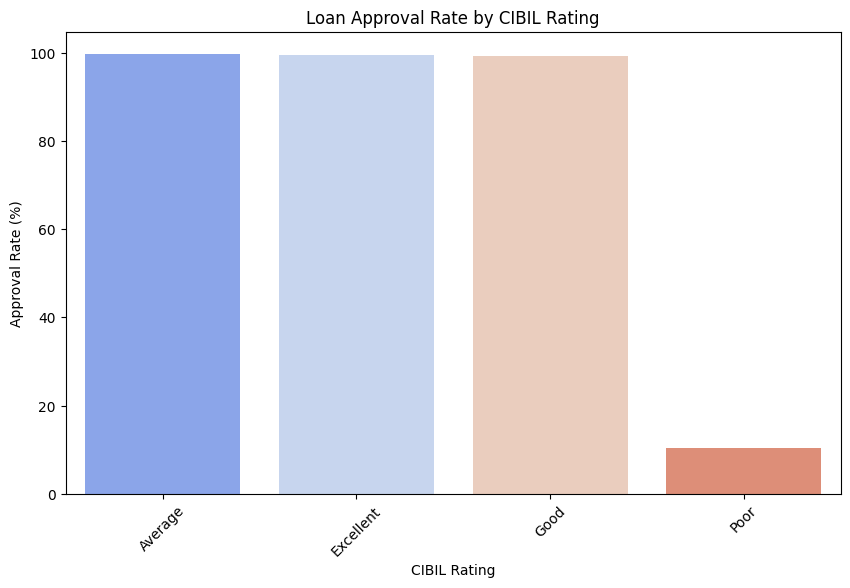

In [37]:
# Pivot Table
pivot_table = cibil_rating.pivot(index='CIBIL_rating', columns='loan_status', values='Total')
pivot_table['Approval Rate'] = pivot_table['Approved'] / (pivot_table['Approved'] + pivot_table['Rejected']) * 100

# Reset index to make CIBIL_rating a column
pivot_table.reset_index(inplace=True)

# Creating Barplot
plt.figure(figsize=(10,6))
sns.barplot(x='CIBIL_rating', y='Approval Rate', data=pivot_table, palette='coolwarm')

# Creating Labels
plt.title("Loan Approval Rate by CIBIL Rating")
plt.xlabel("CIBIL Rating")
plt.ylabel("Approval Rate (%)")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()

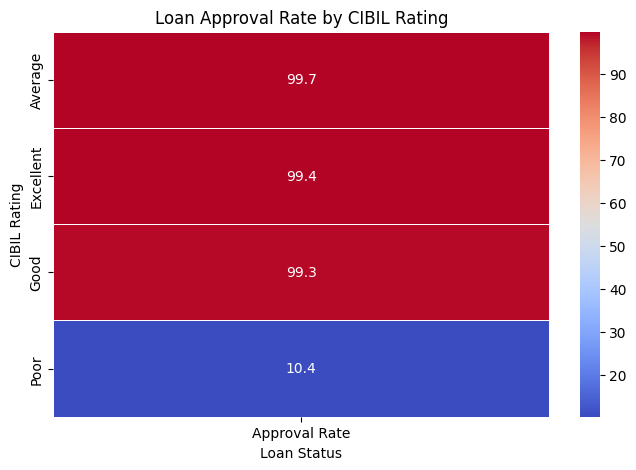

In [38]:
# Pivot Table
pivot_table = cibil_rating.pivot(index='CIBIL_rating', columns='loan_status', values='Total')
pivot_table['Approval Rate'] = pivot_table['Approved'] / (pivot_table['Approved'] + pivot_table['Rejected']) * 100

# Creating heatmap
plt.figure(figsize=(8,5))
sns.heatmap(pivot_table[['Approval Rate']], annot=True, fmt='.1f', cmap='coolwarm', linewidth=0.5)

# Creating Labels
plt.title("Loan Approval Rate by CIBIL Rating")
plt.xlabel("Loan Status")
plt.ylabel("CIBIL Rating")

plt.show()

# Correlation Analysis

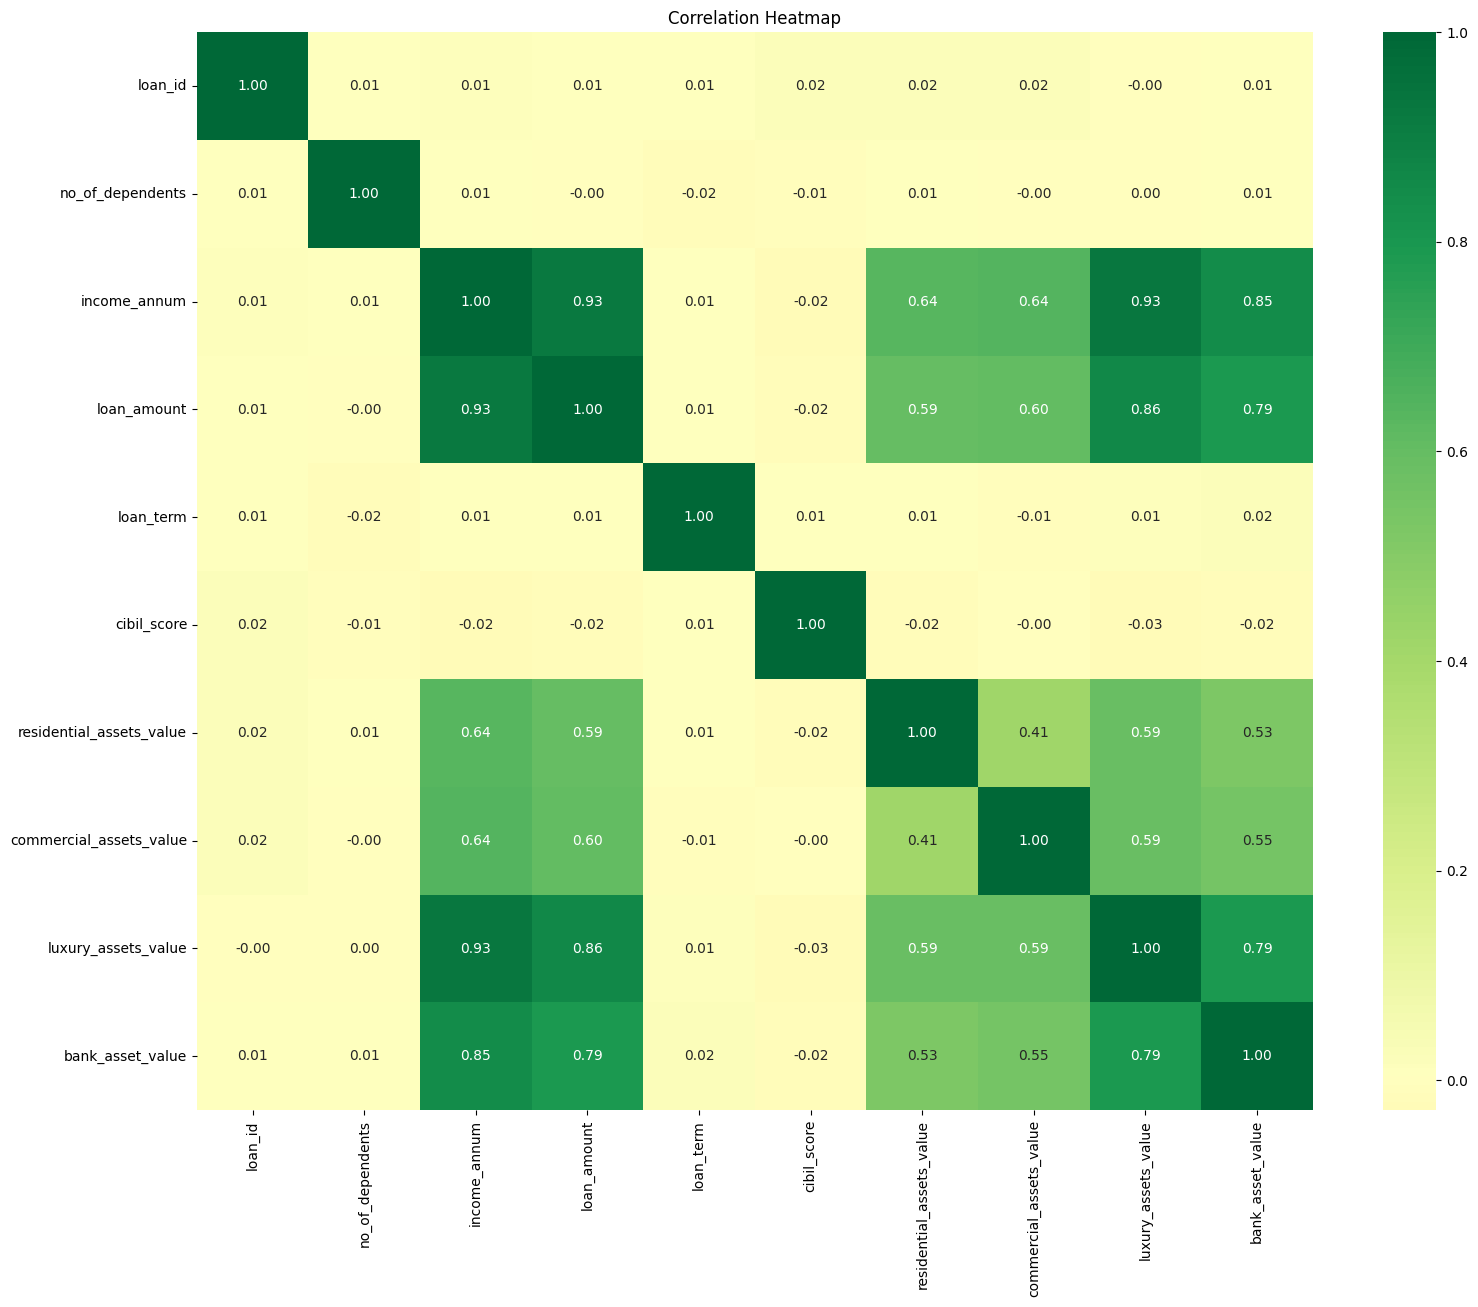

In [39]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Creating heatmap
plt.figure(figsize=(18, 14))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', center=0, cmap='RdYlGn')
plt.title("Correlation Heatmap")
plt.show()

In [40]:
# Correlation between asset value and income
assets = ['residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']
income = 'income_annum'

# Calculate the correlation(Pearson Correlation)
correlations = df [assets + [income]].corr()

correlations.head()

,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,income_annum
residential_assets_value,1.000000,0.414799,0.590919,0.527401,0.636824
commercial_assets_value,0.414799,1.000000,0.591128,0.548576,0.640328
luxury_assets_value,0.590919,0.591128,1.000000,0.788517,0.929145
bank_asset_value,0.527401,0.548576,0.788517,1.000000,0.851093
income_annum,0.636824,0.640328,0.929145,0.851093,1.000000


In [41]:
# Correlation between asset value and Loan
assets = ['residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']
loan = 'loan_amount'

# Calculate the correlation(Pearson Correlation)
correlations = df [assets + [loan]].corr()

correlations.head()

,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_amount
residential_assets_value,1.000000,0.414799,0.590919,0.527401,0.594582
commercial_assets_value,0.414799,1.000000,0.591128,0.548576,0.603188
luxury_assets_value,0.590919,0.591128,1.000000,0.788517,0.860914
bank_asset_value,0.527401,0.548576,0.788517,1.000000,0.788122
loan_amount,0.594582,0.603188,0.860914,0.788122,1.000000


# Asset value impact/Influence on loan approval

In [42]:
# If there's a relation between asset value and getting a loan approval
# Splitting data into groups
approved = df[df['loan_status'] == "Approved"]
rejected = df[df['loan_status'] == "Rejected"]

# Perform a T-test
assets = ['residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']

for column in assets:
    t_stat, p_value = ttest_ind(approved[column], rejected[column], equal_var=False)
    print(f"T-Test for {column}: ")
    print(f"  T-statistic: {t_stat}")
    print(f"  P-Value: {p_value}")
    if p_value < 0.05: # 95% Confidence Interval
        print(f"The difference in {column} between approved and rejected loans is statistically significant.")
    else:
        print(f"The difference in {column} between approved and rejected loans is not statistically significant.")

T-Test for residential_assets_value: 
  T-statistic: -0.9399394365500209
  P-Value: 0.34731539500224484
The difference in residential_assets_value between approved and rejected loans is not statistically significant.
T-Test for commercial_assets_value: 
  T-statistic: 0.5387741456120382
  P-Value: 0.5900779272018966
The difference in commercial_assets_value between approved and rejected loans is not statistically significant.
T-Test for luxury_assets_value: 
  T-statistic: -1.013970039592796
  P-Value: 0.3106683217824068
The difference in luxury_assets_value between approved and rejected loans is not statistically significant.
T-Test for bank_asset_value: 
  T-statistic: -0.4448616890142232
  P-Value: 0.6564475917396153
The difference in bank_asset_value between approved and rejected loans is not statistically significant.


# Using ANOVA to determine a correlation between asset value and income

In [43]:
# Null Hypothesis: There is no relation(Significant influence) between assets and income.
# Alternate Hypothesis: There is a relation(Significant Influence) between assets and income.

# Extracting values in the columns
residential_asset = df['residential_assets_value']
commercial_asset = df['commercial_assets_value']
luxury_asset = df['luxury_assets_value']
bank_asset = df['bank_asset_value']
income = df['income_annum']

# Performing ANOVA
f_statistics, p_value = f_oneway(residential_asset, commercial_asset, luxury_asset, bank_asset, income)

print(f"The F-Statistics: {f_statistics}")
print(f"P-Value: {p_value}")

# interpretation of results
if p_value < 0.05:
    print("There is a significant influence of income on assets.")
else:
    print("There is no signinficant influence of income on assets.")

The F-Statistics: 2518.654468935116
P-Value: 0.0
There is a significant influence of income on assets.


In [44]:
# Correlation between assets and income
# Splitting data into groups
income = df['income_annum']
loan = df['loan_amount']


t_stat, p_value = ttest_ind(income, loan, equal_var=False)

print(f"  T-statistic: {t_stat}")
print(f"  P-Value: {p_value}")
if p_value < 0.05: # 95% Confidence Interval
    print(f"The difference in {column} between approved and rejected loans is statistically significant.")
else:
    print(f"The difference in {column} between approved and rejected loans is not statistically significant.")

  T-statistic: -69.51489699866843
  P-Value: 0.0
The difference in bank_asset_value between approved and rejected loans is statistically significant.


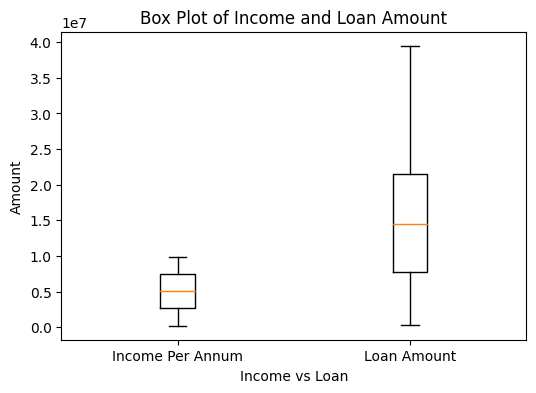

In [45]:
# Box plot to represent the relation between assets and income
# Splitting data into groups
income = df['income_annum']
loan = df['loan_amount']

plt.figure(figsize=(6,4))
ax = plt.axes()

ax.boxplot([income, loan], labels=["Income Per Annum", "Loan Amount"])

plt.xlabel("Income vs Loan")
plt.ylabel("Amount")
plt.title("Box Plot of Income and Loan Amount")
plt.show()

In [46]:
# Chi Squared Analysis: Deteremine the relation between loan status and number of dependents.
df.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status',
       'CIBIL_rating', 'Income level', 'Loan Rating', 'Loan Term Type',
       'Dependent Level'],
      dtype='object')

In [47]:
# Creating Contingency table
contingency_table = pd.crosstab(df['loan_status'], df['Dependent Level'])

# perform Chi squared test
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi Squared Test Statistics: {chi2}")
print(f"P-Value Statistics: {p_value}")
print(f"DOF: {dof}")

if p_value < 0.05:
    print("There is a statistically significant relation between loan status and number of dependents.")
else:
    print("There is no statistically significant relation between loan status and number of dependents.")

Chi Squared Test Statistics: 1.1296798036848839
P-Value Statistics: 0.5684511474541935
DOF: 2
There is no statistically significant relation between loan status and number of dependents.


# Convert categorical data into numerical

In [48]:
def edu_status(status):
    if status == "Graduate":
        return 1
    elif status == "Not Graduate":
        return 0
    else:
        return "Unknown"
df['edu_status'] = df['education'].apply(edu_status)

def type_employment(employment):
    if employment == "Yes":
        return 1
    elif employment == "No":
        return 0
    else:
        return "Unknown"
df['type_employment'] = df['self_employed'].apply(type_employment)

def loan_approval(status):
    if status == "Approved":
        return 1
    elif status == "Rejected":
        return 0
    else:
        return "Unknown"
df['loan_approval'] = df['loan_status'].apply(loan_approval)

In [49]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,...,bank_asset_value,loan_status,CIBIL_rating,Income level,Loan Rating,Loan Term Type,Dependent Level,edu_status,type_employment,loan_approval
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,...,8000000,Approved,Excellent,High,Gold,Intermediate,Moderate,1,0,1
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,...,3300000,Rejected,Poor,Upper-Middle,Silver,Intermediate,Low,0,1,0
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,...,12800000,Rejected,Poor,High,Gold,Long Term,Moderate,1,0,0
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,...,7900000,Rejected,Poor,High,Platinum,Intermediate,Moderate,1,0,0
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,...,5000000,Rejected,Poor,High,Gold,Long Term,High,0,1,0


In [50]:
# Seperating the x-axis values

X = df.drop(columns=['loan_id', 'education', 'CIBIL_rating', "Income level", 
                     "Loan Rating", 'Loan Term Type', 'Dependent Level', 'loan_status', "loan_approval", 'self_employed'])

X

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,edu_status,type_employment
0,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1,0
1,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0,1
2,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1,0
3,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1,0
4,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4264,5,1000000,2300000,12,317,2800000,500000,3300000,800000,1,1
4265,0,3300000,11300000,20,559,4200000,2900000,11000000,1900000,0,1
4266,2,6500000,23900000,18,457,1200000,12400000,18100000,7300000,0,0
4267,1,4100000,12800000,8,780,8200000,700000,14100000,5800000,0,0


In [51]:
# Define the y-axis
y = df['loan_approval']

y.head()

0    1
1    0
2    0
3    0
4    0
Name: loan_approval, dtype: int64

# Building Machine Learning Models

In [52]:
# Importing the Logistic Regression modules

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [53]:
# Splitting the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
print("The size of training input is", X_train.shape)
print("The size of training output is", y_train.shape)
print(50 *'*')
print("The size of testing input is", X_test.shape)
print("The size of testing output is", y_test.shape)

The size of training input is (3415, 11)
The size of training output is (3415,)
**************************************************
The size of testing input is (854, 11)
The size of testing output is (854,)


In [55]:
# to store accuracy value
train_accu = []
test_accu = []

In [56]:

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the training and testing features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [57]:
X_train_scaled

array([[ 1.51250774,  1.00950021,  1.62477248, ...,  1.16041374,
        -1.00263891, -1.01504731],
       [-1.43500078,  1.61417128,  2.07712843, ...,  0.88201987,
        -1.00263891,  0.98517575],
       [-0.84549907, -1.51589075, -1.35415691, ..., -1.31419838,
         0.99736803, -1.01504731],
       ...,
       [ 0.92300603,  1.25848241,  0.5986968 , ...,  0.13963624,
        -1.00263891,  0.98517575],
       [-0.25599737,  0.68938023,  0.68696138, ...,  1.4388076 ,
        -1.00263891,  0.98517575],
       [ 0.92300603,  0.40482913,  0.23460543, ..., -0.10782497,
         0.99736803, -1.01504731]])

In [58]:
X_test_scaled

array([[ 1.51250774,  0.12027804,  0.49939915, ...,  0.72735662,
         0.99736803, -1.01504731],
       [-0.25599737,  0.29812247, -0.12948594, ...,  0.54176071,
         0.99736803, -1.01504731],
       [ 0.33350433,  1.61417128,  0.5214653 , ...,  0.51082806,
         0.99736803, -1.01504731],
       ...,
       [ 1.51250774,  0.19141581, -0.40531274, ...,  0.88201987,
        -1.00263891,  0.98517575],
       [ 0.92300603, -1.01792634, -0.72527182, ..., -1.09766982,
        -1.00263891, -1.01504731],
       [-0.84549907, -0.76894413, -0.6921726 , ..., -0.97393921,
        -1.00263891, -1.01504731]])

# Logistic regression Classifier

In [59]:
# Initialize and train the logistic regression model
log_reg = LogisticRegression(random_state=0).fit(X_train_scaled, y_train)

In [60]:
# Make predictions on the training set
y_train_pred = log_reg.predict(X_train_scaled)

# Calculate accuracy on the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_accu.append(train_accuracy)
print("Training Accuracy:", train_accuracy)

Training Accuracy: 0.9203513909224011


In [61]:
# Make predictions on the testing set
y_test_pred = log_reg.predict(X_test_scaled)

# Calculate accuracy on the testing set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_accu.append(test_accuracy)
print("Testing Accuracy:", test_accuracy)

Testing Accuracy: 0.905152224824356


# KNN classifier

In [62]:
# Create and train the model
k = 3  # Number of neighbors
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [63]:
# Predict the target variable for training and testing sets
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

In [64]:
# Calculate accuracy for training and testing sets
train_accuracy = accuracy_score(y_train, y_train_pred)
train_accu.append(train_accuracy)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_accu.append(test_accuracy)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)


Training Accuracy: 0.9528550512445095
Testing Accuracy: 0.8934426229508197


# Decision Tree Classifier

In [65]:
# Initialize the Decision Tree Classifier model
dt_classifier = DecisionTreeClassifier(random_state=0)

# Train the model using the training sets
dt_classifier.fit(X_train, y_train)


DecisionTreeClassifier(random_state=0)

In [66]:
# Predict the target variable for training and testing sets
y_train_pred = dt_classifier.predict(X_train)
y_test_pred = dt_classifier.predict(X_test)


In [67]:
# Calculate accuracy for training and testing sets
train_accuracy = accuracy_score(y_train, y_train_pred)
train_accu.append(train_accuracy)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_accu.append(test_accuracy)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)


Training Accuracy: 1.0
Testing Accuracy: 0.9707259953161592


# Random Forest Classifier

In [68]:
# Initialize the Random Forest Classifier model
rf_classifier = RandomForestClassifier(random_state=0)

# Train the model using the training sets
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=0)

In [69]:
# Predict the target variable for training and testing sets
y_train_pred = rf_classifier.predict(X_train)
y_test_pred = rf_classifier.predict(X_test)


In [70]:
# Calculate accuracy for training and testing sets
train_accuracy = accuracy_score(y_train, y_train_pred)
train_accu.append(train_accuracy)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_accu.append(test_accuracy)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)


Training Accuracy: 1.0
Testing Accuracy: 0.9836065573770492


In [71]:
# Get feature importances
importances = rf_classifier.feature_importances_
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print(feature_importances)

                     Feature  Importance
4                cibil_score    0.813293
3                  loan_term    0.063467
2                loan_amount    0.029047
1               income_annum    0.017510
7        luxury_assets_value    0.016298
5   residential_assets_value    0.016116
8           bank_asset_value    0.015648
6    commercial_assets_value    0.015199
0           no_of_dependents    0.008275
10           type_employment    0.002631
9                 edu_status    0.002515


In [72]:
# List of least important features to be removed
least_important_features = ['no_of_dependents', 'type_employment', 'edu_status']

# Remove these features from the training and testing datasets
X_train_reduced = X_train.drop(columns=least_important_features)
X_test_reduced = X_test.drop(columns=least_important_features)

In [73]:
# Initialize the Random Forest Classifier
rf_classifier_reduced = RandomForestClassifier()

# Train the model on the reduced dataset
rf_classifier_reduced.fit(X_train_reduced, y_train)

# Make predictions
y_pred = rf_classifier_reduced.predict(X_test_reduced)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the model with reduced features: {accuracy:.4f}')

Accuracy of the model with reduced features: 0.9742


In [74]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_test_pred)  
print(cm)

[[310   8]
 [  6 530]]


In [78]:
data = {'Actual Values': y_test, 'Predicted Values': y_test_pred}
df = pd.DataFrame(data)
print(df)


      Actual Values  Predicted Values
1703              0                 0
1173              1                 1
308               0                 0
1322              1                 1
3271              1                 1
...             ...               ...
912               1                 1
443               1                 1
1483              1                 1
668               0                 0
1114              0                 0

[854 rows x 2 columns]


In [74]:
algorithm=['Logistic Regressor','KNN classifier','Decision Tree','Random Forest']
accu_data = {'Training Accuracy':train_accu,'Test Accuracy':test_accu}
model = pd.DataFrame(accu_data, index = algorithm)
model

,Training Accuracy,Test Accuracy
Logistic Regressor,0.920351,0.905152
KNN classifier,0.952855,0.893443
Decision Tree,1.000000,0.970726
Random Forest,1.000000,0.983607


# Save the Model

In [75]:
import pickle
# open a file, where you want to store the data
file = open('loan_rf.pkl', 'wb')

# dump information to that file
pickle.dump(rf_classifier, file)

In [76]:
# Load the model from the saved file
with open('loan_rf.pkl', 'rb') as file:
    loaded_model = pickle.load(file)